# 1.0 Dependencies

In [103]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from datetime import datetime


## 1.1 Defining default figuresize parameters

In [104]:
plt.rcParams['figure.figsize'] = [20, 5]

# 2.0 Gathering data

Manual CSV downloads were taken from https://finance.yahoo.com/

## 2.1 Asking the user to select the folder where data is

In [105]:
#Create GUI
Mastergui = tk.Tk()
folder_selected = filedialog.askdirectory(title="Select location of data")
Mastergui.destroy()

## Read .csv data to dataframes

In [106]:
stock_tickers=['AAPL','IBM','MSFT']
aapl=pd.read_csv(folder_selected+'/'+stock_tickers[0]+'.csv',parse_dates=True,index_col='Date')
ibm=pd.read_csv(folder_selected+'/'+stock_tickers[1]+'.csv',parse_dates=True,index_col='Date')
msft=pd.read_csv(folder_selected+'/'+stock_tickers[2]+'.csv',parse_dates=True,index_col='Date')

In [107]:
#inspecting the data
ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,0.662902,387200
1962-01-03,7.626667,7.693333,7.626667,7.693333,0.668697,288000
1962-01-04,7.693333,7.693333,7.613333,7.616667,0.662033,256000
1962-01-05,7.606667,7.606667,7.453333,7.466667,0.648996,363200
1962-01-08,7.460000,7.460000,7.266667,7.326667,0.636827,544000


# 3.0 Plotting the data

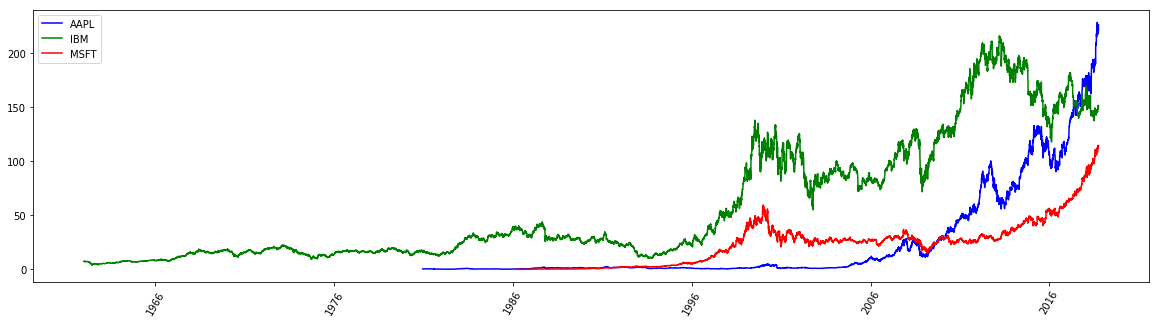

In [108]:
plt.plot(aapl['Close'],label='AAPL',color='blue')
plt.plot(ibm['Close'],label='IBM',color='green')
plt.plot(msft['Close'],label='MSFT',color='red')

#add a legend for clarity
plt.legend(loc='upper left')

#rotate labels of x-axis
plt.xticks(rotation=60)
plt.show()

## 3.1 Plotting with time slicing

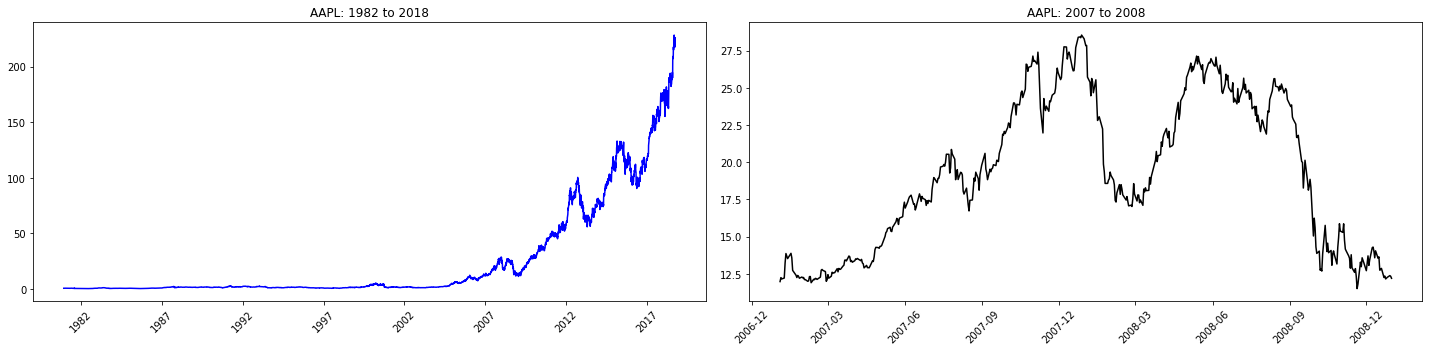

In [109]:
# Plot the series in the top subplot in blue
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('AAPL: 1982 to 2018')
plt.plot(aapl['Close'], color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['Close']['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

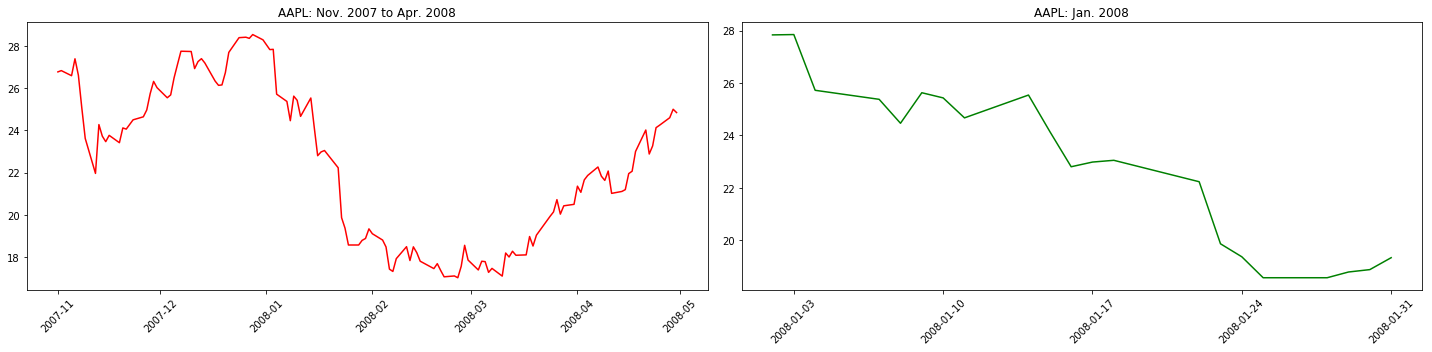

In [110]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['Close']['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(1,2,1)
plt.plot(view,color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

# Reassign the series by slicing the month January 2008
view = aapl['Close']['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(1,2,2)
plt.plot(view,color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()


## 3.2 Plotting with inset plots for focus

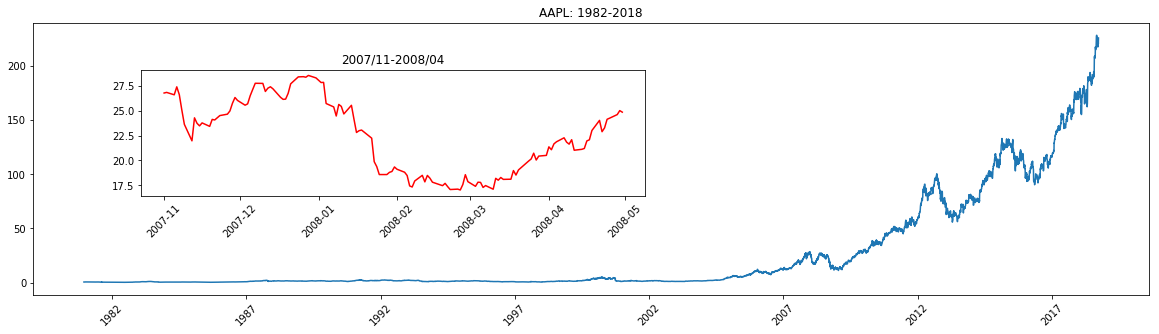

In [111]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['Close']['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl['Close'])
plt.xticks(rotation=45)
plt.title('AAPL: 1982-2018')

# Specify the axes
plt.axes([0.20,0.4,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()


# 4.0 Moving averages

Data taken from the below, some work is required to get a dataframe in the same state as the tutorial https://datamarket.com/data/set/22ti/zuerich-monthly-sunspot-numbers-1749-1983#!ds=22ti&display=line

## 4.1 Preparing the data 

In [112]:
#importing the data into a DataFrame
sunspot=pd.read_csv(folder_selected+'/'+'sunspot'+'.csv',parse_dates=True)

In [113]:
#Inspecting data
sunspot.tail()

,Month,Zuerich monthly sunspot numbers 1749-1983
2817,1983-10,55.8
2818,1983-11,33.3
2819,1983-12,33.4
2820,NaN,NaN
2821,Zuerich monthly sunspot numbers 1749-1983,NaN


In [114]:
# dropping the last few rows with NaN values and then confirming
sunspot=sunspot.dropna()
sunspot.tail(2)

,Month,Zuerich monthly sunspot numbers 1749-1983
2818,1983-11,33.3
2819,1983-12,33.4


Anonymously .apply the datetime.strptime function by defining the input format string. Reference: https://www.tutorialspoint.com/python/time_strptime.htm

In [115]:
sunspot['Month']=sunspot['Month'].apply(lambda x: datetime.strptime(x,'%Y-%m'))

#Renaming columns to something more usable
sunspot.rename(columns={'Zuerich monthly sunspot numbers 1749-1983':'Sunspots'}, inplace=True)

In [116]:
# set the index to the 'Month' column
sunspot=sunspot.set_index('Month')
sunspot.tail(1)

,Sunspots
Month,
1983-12-01,33.4


## 4.2 Calculating rolling means

In [117]:
#define example windows. Number represents the number of observations
windows=[120,300,600,1200]

#Create new dataframe to append rolling means to
sunspot_means=pd.DataFrame(sunspot['Sunspots'])

#loop through all windows: Create series and append to above dataframe
for window in windows:
    sunspot_means['mean_'+str(window)]=sunspot_means['Sunspots'].rolling(window).mean()
    
#Inspect
sunspot_means.tail()

,Sunspots,mean_120,mean_300,mean_600,mean_1200
Month,,,,,
1983-08-01,71.8,81.281667,76.307667,75.228333,56.428083
1983-09-01,50.3,81.206667,75.804667,75.303667,56.426167
1983-10-01,55.8,81.415833,75.385667,75.391667,56.402833
1983-11-01,33.3,81.494167,74.989000,75.446167,56.360167
1983-12-01,33.4,81.578333,74.475000,75.501333,56.324750


## 4.3 Plotting rollings means

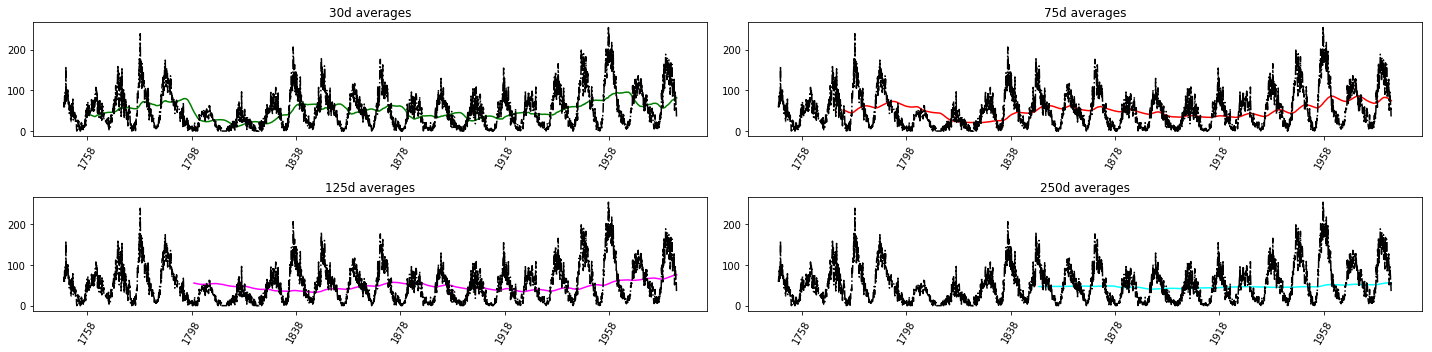

In [118]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(sunspot_means.mean_120, 'green')
plt.plot(sunspot_means.Sunspots, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(sunspot_means.mean_300, 'red')
plt.plot(sunspot_means.Sunspots, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(sunspot_means.mean_600, 'magenta')
plt.plot(sunspot_means.Sunspots, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2, 4)
plt.plot(sunspot_means.mean_1200, 'cyan')
plt.plot(sunspot_means.Sunspots, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.tight_layout()
plt.show()


# 5.0 Rolling standard deviations

## 5.1 Calculating rolling standard deviations

In [119]:
#define example windows. Number represents the number of observations
windows=[120,300,600,1200]

#Create new dataframe to append rolling means to
sunspot_std=pd.DataFrame(sunspot['Sunspots'])

#create list of new columns used to create plots below
sunspot_std_col=[]

#loop through all windows: Create series and append to above dataframe
for window in windows:
    sunspot_std['std_'+str(window)]=sunspot_std['Sunspots'].rolling(window).std()
    sunspot_std_col.append('std_'+str(window))

#Inspect
sunspot_std.tail(3)

,Sunspots,std_120,std_300,std_600,std_1200
Month,,,,,
1983-10-01,55.8,58.141634,50.656091,54.779904,48.051765
1983-11-01,33.3,58.069780,50.517523,54.721606,48.049527
1983-12-01,33.4,57.991992,50.151048,54.662375,48.050775


## 5.2 Plotting rolling standard deviations

The next section produces a similar output to the datacamp course, obviously on a different dataset. Here instead of constructing each plot individually, here we construct with a lazy for loop to reference the list indices

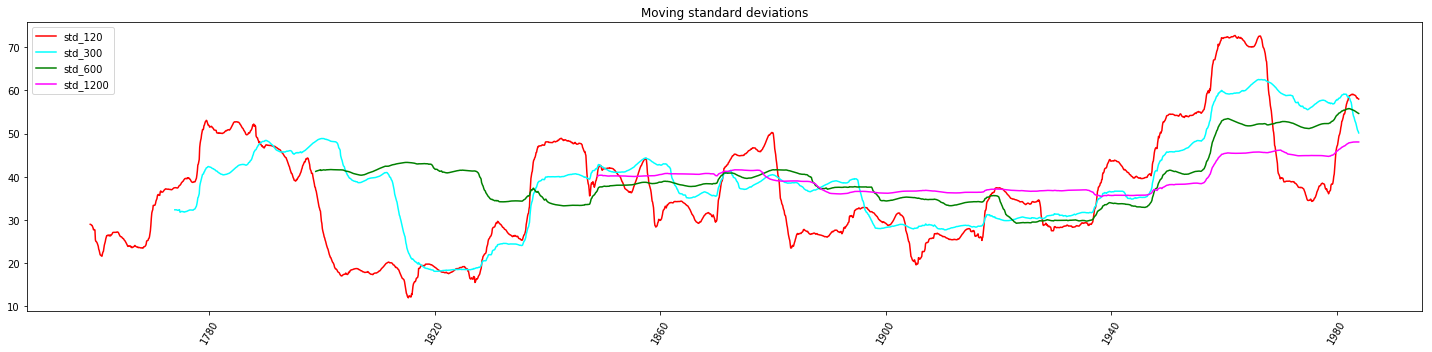

In [120]:
#list of subplot positions
stds=[1,2,3,4]

#Colors we want each series to be in
colors=['red','cyan','green','magenta']

#loop through each subplot and using indexing to populate parameters
for std in stds:
    col=sunspot_std_col[std-1]
    color=colors[std-1]
    plt.plot(sunspot_std[col], color)
    plt.xticks(rotation=60)
plt.title('Moving standard deviations')
plt.legend(loc='upper left')    
plt.tight_layout()
plt.show()

# 6.0 Histogram equalization in images

Basic workflow:<ul>
  <li>Read image</li>
  <li>Flatten 2D array to 1D</li>
  <li>Plot histogram</li>
    <ul style="list-style-type:circle">
        <li>bins: number of bins</li>
        <li>range: interval of available values</li>
        <li>normed: True=rescales area under histogram to be 1</li>
        <li>alpha: 0.3 makes lines partially transparent</li>
        <li>plot histogram</li>
    </ul>
    <li>Then rescale (see below) </li>
</ul>
    

## 6.1 Reading the image and then flattening the array

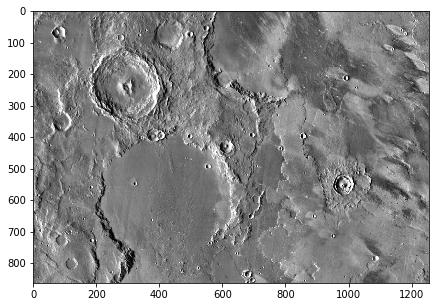

In [121]:
orig=plt.imread(folder_selected+'/moonLC.jpg')
plt.imshow(orig,cmap='gray')

In [122]:
pixels=orig.flatten()

## 6.2 Plotting the histogram

Note: parameter 'normed' has been depreciated to 'density'

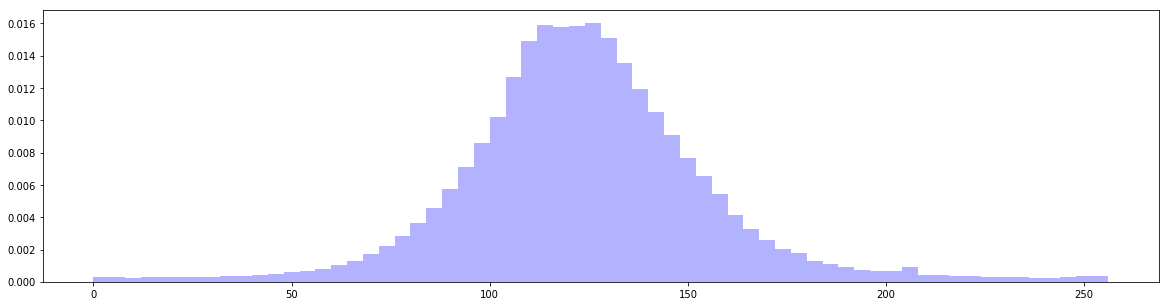

In [123]:
plt.hist(pixels,bins=64,range=(0,256),density=True,alpha=0.3,color='blue')
plt.show()

## 6.3 Cumulative Distribution Function (CDF) from an image histogram

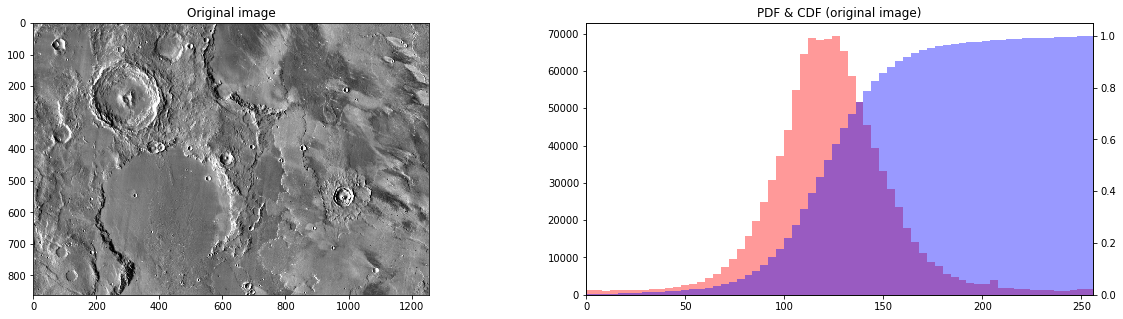

In [124]:
# Display image in top subplot using color map 'gray'
plt.subplot(1,2,1)
plt.imshow(orig, cmap='gray')
plt.title('Original image')

# Display a histogram of the pixels in the bottom subplot
plt.subplot(1,2,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               density=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.title('PDF & CDF (original image)')
plt.show()



## 6.4 Equalizing an image histogram (Sharper: Contrast Enhancing)

For the below and in the datacamp exercise I could not see what the difference is between the images, but perhaps photographers can

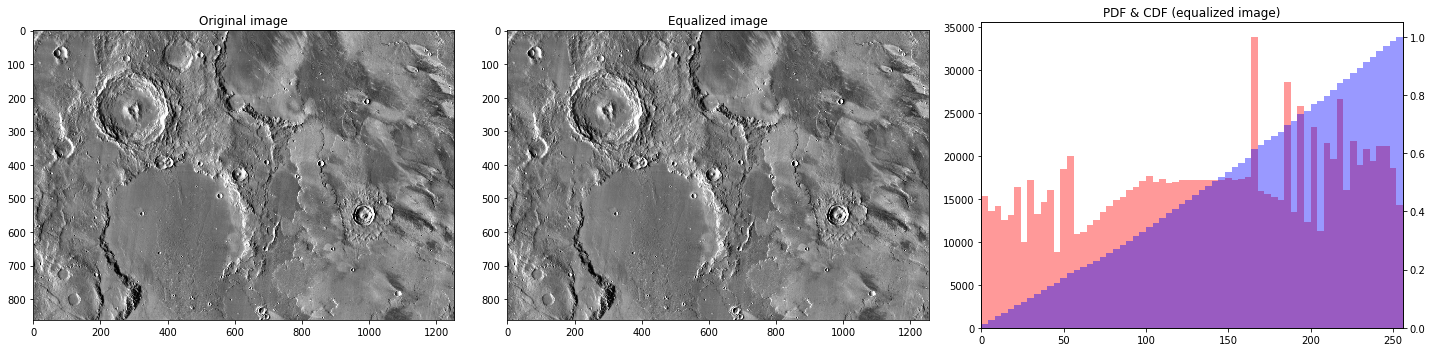

In [125]:
# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=64, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = pixels.reshape(orig.shape)

#display original
plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(orig,cmap='gray')

# Display the new image with 'gray' color map
plt.subplot(1,3,2)
plt.title('Equalized image')
plt.imshow(new_image,cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(1,3,3)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, density=True,
               color='blue', alpha=0.4)
plt.tight_layout()
plt.show()

## 6.5 Histograms of colour images

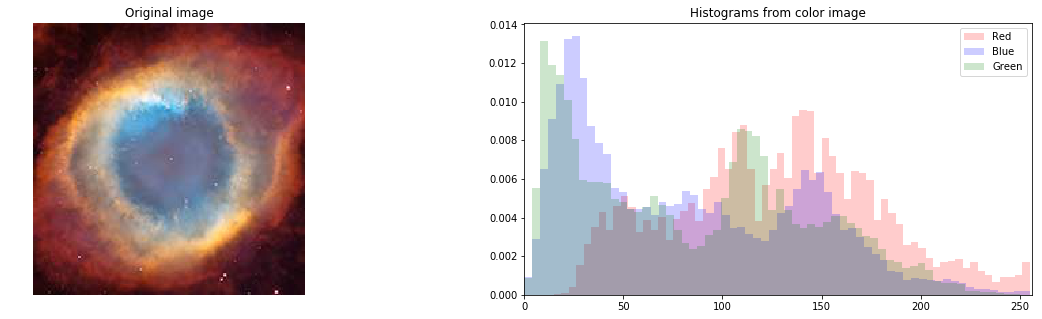

In [126]:
# Load the image into an array: image
image = plt.imread(folder_selected+'/space.jpg')

# Display image in top subplot
plt.subplot(1,2,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(1,2,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, density=True, color='red', alpha=0.2,label='Red')
plt.hist(blue_pixels, bins=64, density=True, color='blue', alpha=0.2,label='Blue')
plt.hist(green_pixels, bins=64, density=True, color='green', alpha=0.2,label='Green')

# Display the plot
plt.legend()
plt.show()


## Extracting bivariate histograms from a color image

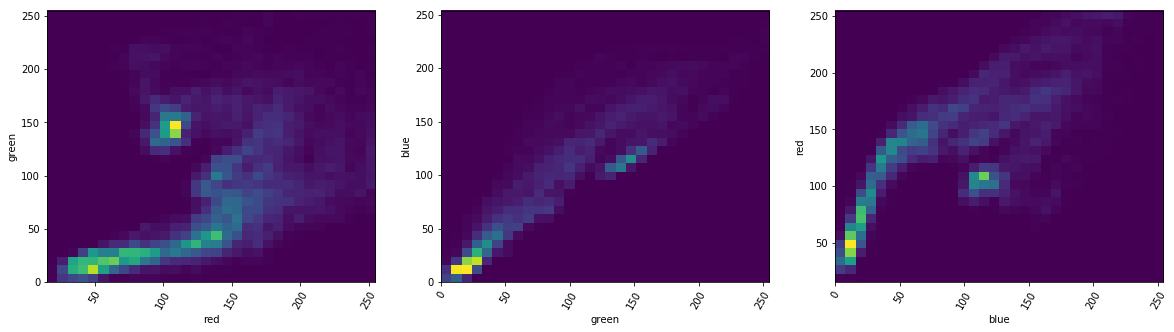

In [127]:
# Load the image into an array: image
image = plt.imread('space.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(1,3,1)
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(x=red_pixels,y=green_pixels,bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(1,3,2)
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(x=green_pixels,y=blue_pixels,bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(1,3,3)
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(x=blue_pixels,y=red_pixels,bins=(32,32))

# Display the plot
plt.show()
